<p style="font-family: Arial; font-size:2.5em;color:green; font-style:bold"><br>
BCIS5110 Assignment 9
</p><br>

In [65]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [66]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<p>Import 'FlightDelays.csv'. The data contains flight information between NYC and DC area in January 2004. Each row is a flight.</p>

In [67]:
flight = pd.read_csv('/content/FlightDelays.csv')

1). Check for basic information. What data types are the variables? Any missing values?

In [68]:
flight.describe()
flight.info()
flight.isnull().sum()

,CRS_DEP_TIME,DEP_TIME,DISTANCE,FL_NUM,Weather,DAY_WEEK
count,2201.000000,2201.000000,2201.000000,2201.000000,2201.000000,2201.000000
mean,1371.938664,1369.298955,211.871422,3815.086324,0.014539,3.905498
std,432.697149,442.462754,13.316815,2409.750224,0.119725,1.903149
min,600.000000,10.000000,169.000000,746.000000,0.000000,1.000000
25%,1000.000000,1004.000000,213.000000,2156.000000,0.000000,2.000000
50%,1455.000000,1450.000000,214.000000,2385.000000,0.000000,4.000000
75%,1710.000000,1709.000000,214.000000,6155.000000,0.000000,5.000000
max,2130.000000,2330.000000,229.000000,7924.000000,1.000000,7.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2201 entries, 0 to 2200
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CRS_DEP_TIME   2201 non-null   int64 
 1   CARRIER        2201 non-null   object
 2   DEP_TIME       2201 non-null   int64 
 3   DEST           2201 non-null   object
 4   DISTANCE       2201 non-null   int64 
 5   FL_DATE        2201 non-null   object
 6   FL_NUM         2201 non-null   int64 
 7   ORIGIN         2201 non-null   object
 8   Weather        2201 non-null   int64 
 9   DAY_WEEK       2201 non-null   int64 
 10  TAIL_NUM       2201 non-null   object
 11  Flight Status  2201 non-null   object
dtypes: int64(6), object(6)
memory usage: 206.5+ KB


,0
CRS_DEP_TIME,0
CARRIER,0
DEP_TIME,0
DEST,0
DISTANCE,0
FL_DATE,0
FL_NUM,0
ORIGIN,0
Weather,0
DAY_WEEK,0


2). What data type is FL_DATE? Use pd.to_datetime to transfer it to datetime data type. What's the time range of this dataset?

In [69]:
flight['FL_DATE'].dtypes
flight['FL_DATE']  = pd.to_datetime(flight['FL_DATE'])
flight['FL_DATE'].dtypes
flight['FL_DATE'].min()
flight['FL_DATE'].max()

dtype('O')

dtype('<M8[ns]')

Timestamp('2004-01-01 00:00:00')

Timestamp('2004-01-31 00:00:00')

3) Create a variable as the day of the month based on FL_DATE.

In [70]:
flight['DayofMonth'] = flight['FL_DATE'].dt.day
flight.head(5)

,CRS_DEP_TIME,CARRIER,DEP_TIME,DEST,DISTANCE,FL_DATE,FL_NUM,ORIGIN,Weather,DAY_WEEK,TAIL_NUM,Flight Status,DayofMonth
0,1455,OH,1455,JFK,184,2004-01-01,5935,BWI,0,4,N940CA,ontime,1
1,1640,DH,1640,JFK,213,2004-01-01,6155,DCA,0,4,N405FJ,ontime,1
2,1245,DH,1245,LGA,229,2004-01-01,7208,IAD,0,4,N695BR,ontime,1
3,1715,DH,1709,LGA,229,2004-01-01,7215,IAD,0,4,N662BR,ontime,1
4,1039,DH,1035,LGA,229,2004-01-01,7792,IAD,0,4,N698BR,ontime,1


4). Find the number of flights on each day. Plot a line chart to show. Hint: you can call .plot() directly after the groupby results.

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='DayofMonth'>

Text(0.5, 0, 'Day of Month')

Text(0, 0.5, 'Number of Flights')

Text(0.5, 1.0, 'Number of Flights on Each Day')

<ipython-input-71-c0b5ecb0a7e6>:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper right', bbox_to_anchor=(1.05, 1))


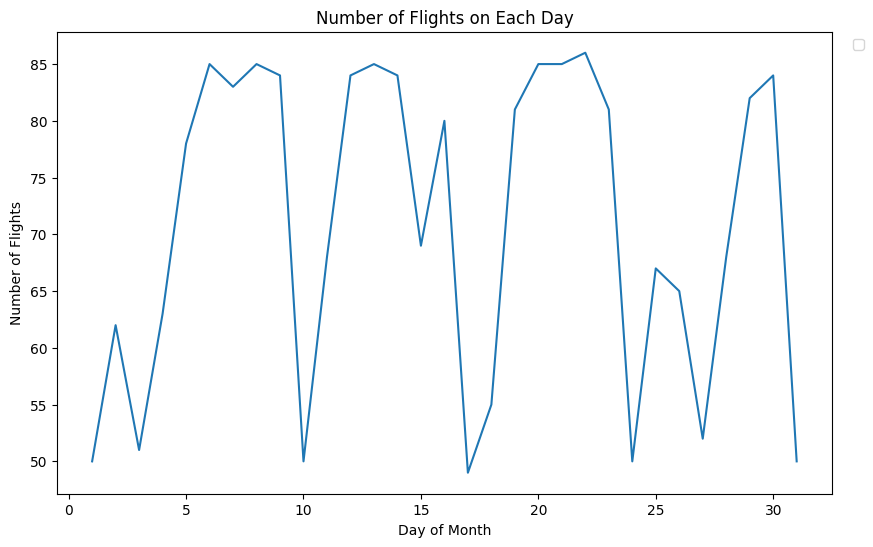

In [71]:
no_of_flights = flight.groupby('DayofMonth').size()

plt.figure(figsize=(10, 6))
no_of_flights.plot()
plt.xlabel('Day of Month')
plt.ylabel('Number of Flights')
plt.title('Number of Flights on Each Day')
plt.legend(loc='upper right', bbox_to_anchor=(1.05, 1))

5). Check variable "DEP_TIME". It is a number, but it actually means a time. For instance, 1455 means 14:55 in the afternoon. Create an "Hour' variable that get the hour of the departure time, e.g. 1455 means the hour is 14. (Hint: what mathematical operation can help you get 14 from 1455?)

In [72]:
flight['DEP_TIME'].head()
flight['Hour'] = flight['DEP_TIME'] // 100

,DEP_TIME
0,1455
1,1640
2,1245
3,1709
4,1035


6). Based on the hour, create a new variable "time_of_day" as "day" and "night". You can have your own definition of day and night, e.g. 6-18 as day 19-5 as night.

In [73]:
flight['time_of_day'] = np.where(flight['Hour'].between(1,12), 'day', 'night')
flight.head(5)
flight['time_of_day'].value_counts()

,CRS_DEP_TIME,CARRIER,DEP_TIME,DEST,DISTANCE,FL_DATE,FL_NUM,ORIGIN,Weather,DAY_WEEK,TAIL_NUM,Flight Status,DayofMonth,Hour,time_of_day
0,1455,OH,1455,JFK,184,2004-01-01,5935,BWI,0,4,N940CA,ontime,1,14,night
1,1640,DH,1640,JFK,213,2004-01-01,6155,DCA,0,4,N405FJ,ontime,1,16,night
2,1245,DH,1245,LGA,229,2004-01-01,7208,IAD,0,4,N695BR,ontime,1,12,day
3,1715,DH,1709,LGA,229,2004-01-01,7215,IAD,0,4,N662BR,ontime,1,17,night
4,1039,DH,1035,LGA,229,2004-01-01,7792,IAD,0,4,N698BR,ontime,1,10,day


,count
time_of_day,
night,1291
day,910


7). Find the number of flights for each pair of DEST (destination aiport) and ORIGIN (origin airport). (Hint: groupby() to identify the unique pairs of DEST and ORIGIN). Make a bar plot for the results. (Hint: you can call .plot() directly after the groupby results.) Which two airports have the most flights?

ORIGIN  DEST
BWI     EWR     115
        JFK      30
DCA     EWR     256
        JFK     149
        LGA     965
IAD     EWR     294
        JFK     207
        LGA     185
dtype: int64

<Axes: xlabel='ORIGIN,DEST'>

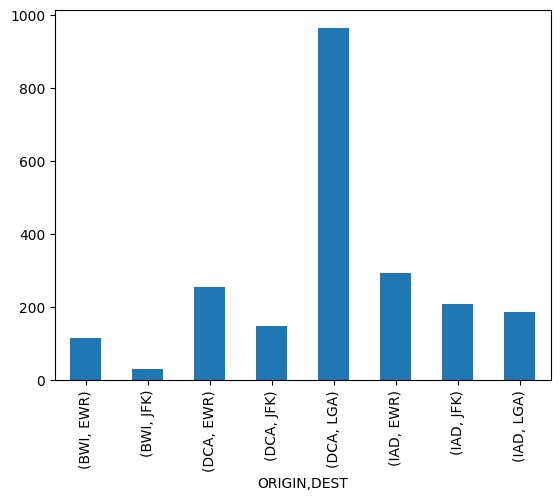

In [74]:
no_of_flights = flight.groupby(['ORIGIN', 'DEST']).size()
no_of_flights
no_of_flights.plot(kind='bar')

# DCA-LGA airports have the highest no of flights.(965)
# IAD-EWR airports have 2nd highest no of flights.(294)

8). Transform "Flight_Status" to dummies. Create a pivot table that gets the ontime rate based on "Weather" and "DAY_OF_WEEK". "DAY_OF_WEEK" indicates which day of the week the flight is, e.g. 4 means Thursday. Hint: refer to our titanic example.

In [75]:
flight = pd.get_dummies(flight, columns=['Flight Status'], prefix='Flight_Status')
pivot_table = pd.pivot_table(flight, values='Flight_Status_ontime', index='Weather', columns='DAY_WEEK', aggfunc='mean')
pivot_table

DAY_WEEK,1,2,3,4,5,6,7
Weather,,,,,,,
0,0.761905,0.835616,0.821875,0.846774,0.810256,0.904,0.737052
1,0.000000,0.000000,NaN,NaN,0.000000,NaN,0.000000


9) Select the flights between LGA and DCA. What is their ontime rate?

In [79]:
# Select flights between LGA and DCA
lga_dca_flights = flight[(flight['ORIGIN'] == 'DCA') & (flight['DEST'] == 'LGA')]
# Calculate the ontime rate
ontime_rate = lga_dca_flights['Flight_Status_ontime'].mean()

print(f"The ontime rate for flights between LGA and DCA is: {ontime_rate}")

The ontime rate for flights between LGA and DCA is: 0.8683937823834197
